In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
saved_model_path = '/content/drive/My Drive/bangkit/model/frutify_classification.h5'

Saving test4.jpg to test4.jpg
1/1 [==============================] - 1s 1s/step
test4.jpg is a fresh orange
[[1.2024944e-16 2.4701505e-20 1.0000000e+00 3.7800583e-21 1.1760818e-17
  4.1414604e-20]]
[0.0, 0.0, 100.0, 0.0, 0.0, 0.0]


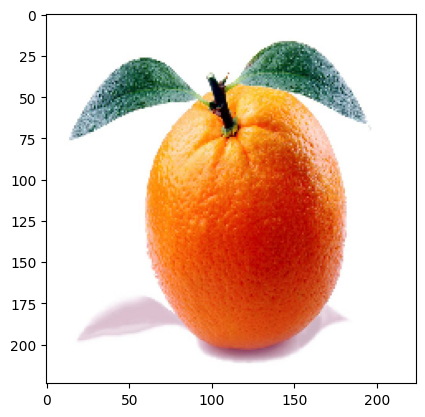

In [15]:
import tensorflow as tf
from tensorflow.keras.utils import get_file
from google.colab import files
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import pathlib
import matplotlib.pyplot as plt
import numpy as np

model_predict = load_model(saved_model_path)
model_predict.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

uploaded = files.upload()

for image_path in uploaded.keys():
  img = tf.keras.utils.load_img(image_path, color_mode = 'rgb', target_size = (224, 224, 3), interpolation = 'nearest')
  img_plot = plt.imshow(img)
  img = tf.keras.utils.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  img = img/255.0

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size = 32)
  predict = np.argmax(classes)
  try:
    if classes[0][0]>0.5:
      prediction = 'fresh apple'
    elif classes[0][1]>0.5:
      prediction = 'fresh banana'
    elif classes[0][2]>0.5:
      prediction = 'fresh orange'
    elif classes[0][3]>0.5:
      prediction = 'rotten apple'
    elif classes[0][4]>0.5:
      prediction = 'rotten banana'
    elif classes[0][5]>0.5:
      prediction = 'rotten orange'
  except:
    prediction = 'fruit does not match our data'

  print('{} is a {}'.format(image_path,prediction))
  print(classes)
  print([float(np.round(x * 100, decimals=3)) for x in classes[0]])

In [1]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
saved_model_path = 'frutify_classification.h5'

In [4]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./frutify_classification_js

2023-06-14 13:11:07.428711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 13:11:08.688483: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
